In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
## Tokenization
myfile = open('historic_events_contents.txt', encoding='utf-8')

In [5]:
# Import txt file
with open('historic_events_contents.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\\n', '')

In [7]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Historic Key Events\n"The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century[edit]\nThe world at the beginning of the century[edit]\nMain article: Edwardian era\nThe new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.', '""The war to end all wars"": World War I (1914â€“1918)[edit]\nMain article: World War I\nArrest of 

In [11]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Historic', 'Key', 'Events', "''", 'The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 

In [13]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4758 samples and 21417 outcomes>


In [15]:
# Get the 10 most common words
common_words = dist_words.most_common(10)

In [17]:
# Create a DataFrame for easy plotting
df = pd.DataFrame(common_words, columns=['Word', 'Count'])

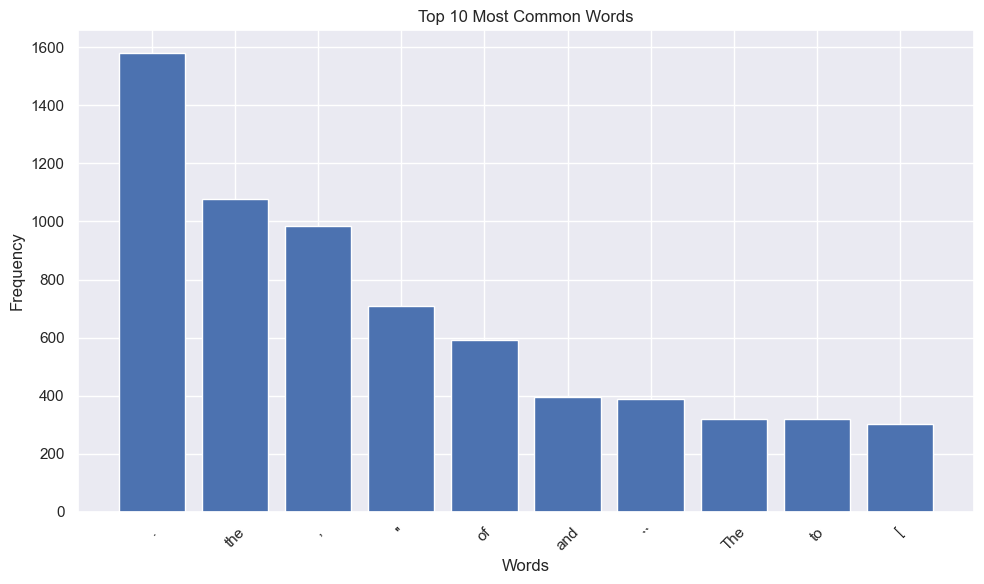

In [19]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Word'], df['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'me', "you've", 'didn', 'with', 'ourselves', 'most', 'shouldn', 'your', 'yourselves', 'our', 'she', 'by', 'who', 'an', 'if', 'only', 'herself', 'then', 'a', 'nor', 'all', "shan't", 'both', 'd', "won't", 'himself', 'such', 'few', 'against', 're', 'their', 'is', 'over', 'am', 'yourself', 'where', "you're", 'did', 'why', 'the', 'can', 'to', 'y', 'doesn', 's', 'won', "weren't", 'her', 'from', "don't", 'have', 'more', 'them', "you'd", 'down', 'be', 'this', "that'll", 'has', 'ma', "needn't", "hasn't", 'wasn', 'been', 'isn', 'on', 'was', 'into', 'ain', 'after', 'hasn', 'you', 'as', 'same', "should've", 'what', 'so', 't', 'through', 'i', 'not', "aren't", 'some', 'mightn', 'he', 'doing', "shouldn't", 'shan', 'own', "wouldn't", 'are', 've', 'having', 'between', 'out', 'its', 'does', 'in', 'yours', 'were', 'do', 'they', "it's", "mightn't", 'because', 'during', "couldn't", 'while', 'again', 'aren', 'my', 'or', 'his', 'itself', 'off', 'too', 'don', "she's", 'that', 'just', 'further', "didn't", 'an

In [23]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
      if word not in stop_words:
          filtered_words.append(word)

In [25]:
filtered_words

['Historic',
 'Key',
 'Events',
 "''",
 'The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today',
 '.',
 'Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'The',
 'world',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'era',
 'The',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 'From',
 '1914',
 '1918',
 ',',
 'First',
 'World'

In [27]:
# Create a new FreqDist for filtered_words
dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4655 samples and 16825 outcomes>


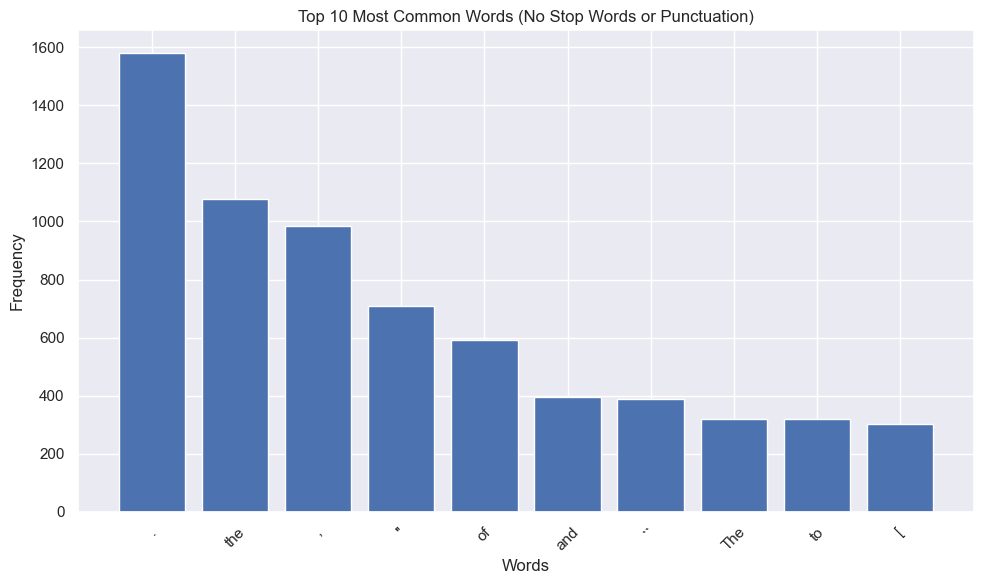

In [29]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Word'], df['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (No Stop Words or Punctuation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
dist_words_filter

FreqDist({'.': 1579, ',': 984, "''": 708, '``': 390, 'The': 318, '[': 302, ']': 302, '^': 268, '(': 236, ')': 236, ...})

In [33]:
# Substitute all punctuations marks with a space
sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                   " ",          # Replace all non-letters with spaces
                   str(filtered_words))

In [35]:
sans_punc

'  Historic    Key    Events          The      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today         Historic    events      th    century         edit         The    world    beginning    century         edit         Main    article         Edwardian    era    The    new    beginning      th    century    marked    significant    changes         The        s    saw    decade    herald    series    inventions         including    automobile         airplane    radio    broadcasting         From                         First    World    War         aftermath         caused    major    changes    power    balance    world         

In [37]:
# Word tokenization
tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Historic', 'Key', 'Events', 'The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'The', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'edit', 'Main', 'article'

In [39]:
# Create a new FreqDist
dist_words_filter_2 = FreqDist(tokenized_word_2)

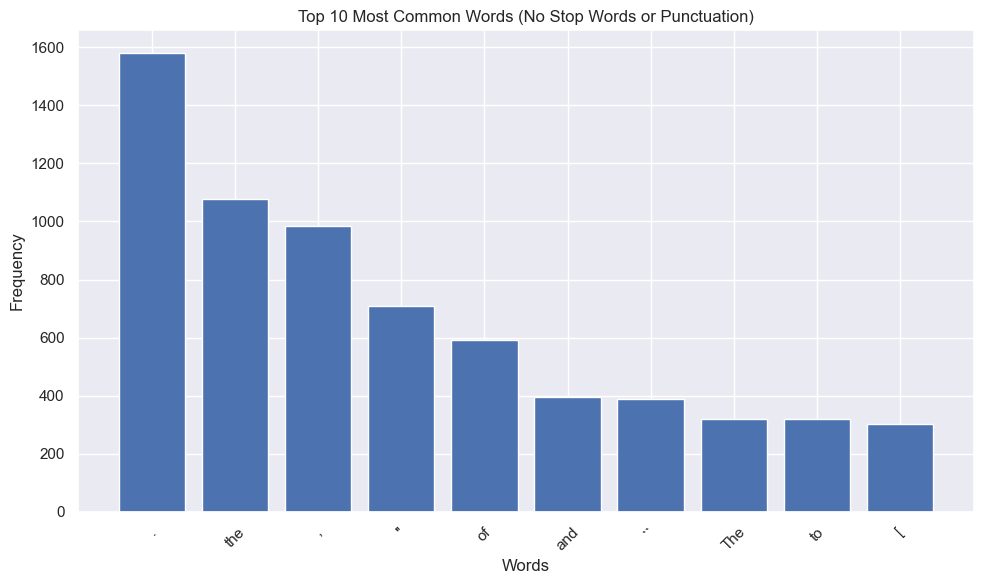

In [41]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Word'], df['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (No Stop Words or Punctuation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
new_stopwords = ["and", "The", 'of', 'to', 's', 'the']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [45]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 24.5 ms


In [47]:
text

TextBlob("['Historic', 'Key', 'Events', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'war', 'end', 'wars', 'World', 'War', 'I', 'edit', 'Main', 'article', 'World', 'War', 'I', 'Arrest', 'sus

In [49]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [51]:
tags_list = text.tags

In [52]:
tags_list

[('[', 'JJ'),
 ("'Historic", 'NNP'),
 ("'", 'POS'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'Events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wars", 'NNS'),
 ("'", 'POS'),
 ("'sparked", 'VBD'),
 ("'tension", 'NNP'),
 ("'", 'POS'),
 ("'countries", 'NNS'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'creation", 'NNP'),
 ("'", 'POS'),
 ("'atomic", 'NNP'),
 ("'", 'POS'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'Space", 'NNP'),
 ("'", 'POS'),
 ("'Race", 'NNP'),
 ("'", 'POS'),
 ("'creation", 'NN'),
 ("'space", 'NNP'),
 ("'", 'POS'),
 ("'based", 'VBD'),
 ("'rockets", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wide", 'NNP'),
 ("'", 'POS'),
 ("'Web", 'NNP'),
 ("'", 'POS'),
 ("'created", 'VBD'),
 ("'These", 'JJ'),
 ("'advancements", 'NNS'),
 ("'", 'POS'),
 ("'significa

In [55]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [57]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Historic,NNP
2,',POS
3,'Key,NNP
4,',POS


In [59]:
df_t = df_text.groupby('Word type').count().reset_index()

In [61]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,73
2,DT,13
3,EX,12
4,FW,42


In [63]:
top10 = df_t.nlargest(10, 'Words')

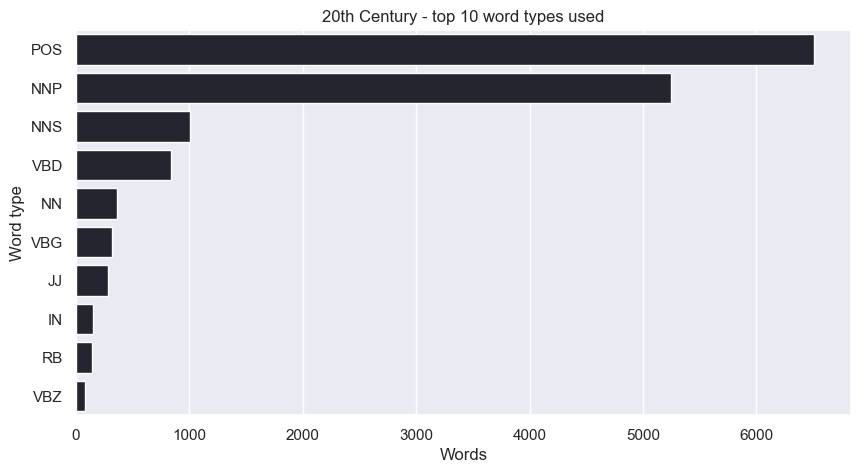

In [65]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
        sns.barplot(x = "Words", y = "Word type",
        saturation = 0.9, data = top10).set_title("20th Century - top 10 word types used")

In [67]:
top10

,Word type,Words
13,POS,6511
11,NNP,5250
12,NNS,1008
16,VBD,841
10,NN,364
17,VBG,317
6,JJ,280
5,IN,151
15,RB,140
20,VBZ,79


In [71]:
#### Nouns
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Words", "Occurences"]
x = df.groupby('Words').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(15, 'Occurences')

In [74]:
top10

,Words,Occurences
1230,'War,124
2501,'war,86
2428,'th,81
1273,'World,74
1082,'Soviet,61
523,'Hitler,51
522,'History,42
2533,'www,39
545,'ISBN,39
1728,'first,38


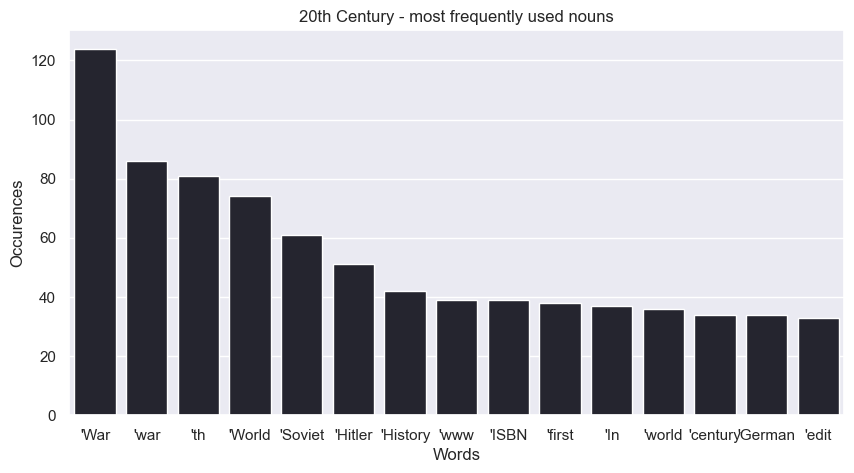

In [77]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
        sns.barplot(x="Words", y="Occurences",
        saturation=0.9, data = top10).set_title("20th Century - most frequently used nouns")

In [80]:
#### Verbs
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Words", "Occurences"]
x = df.groupby('Words').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(15, 'Occurences')

In [83]:
top10

,Words,Occurences
26,'Retrieved,205
35,'United,30
0,'Allied,18
193,'led,15
310,'used,13
191,'launched,12
1,'Archived,10
92,'controlled,9
159,'forced,8
302,'turned,7


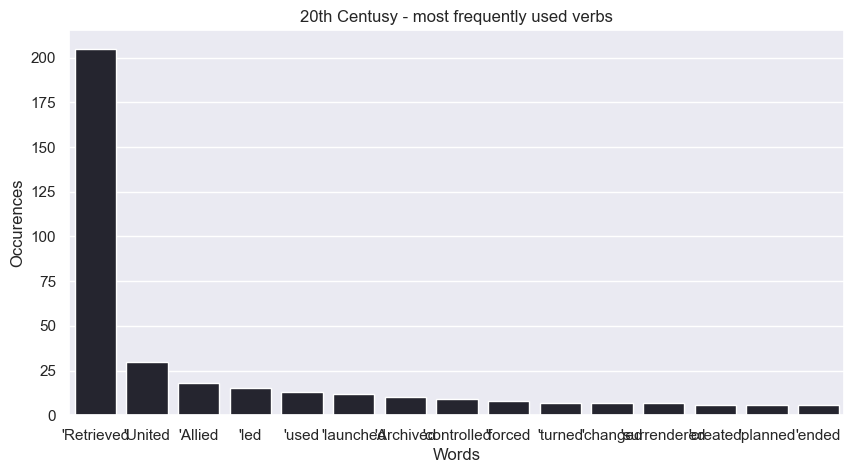

In [86]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Occurences",
    saturation = 0.9, data = top10).set_title("20th Centusy - most frequently used verbs")

In [89]:
#### Adjectives
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Words", "Occurences"]
x = df.groupby('Words').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(15, 'Occurences')

In [91]:
top10

,Words,Occurences
28,'Japanese,35
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
1,'African,6
103,'political,6
104,'possible,5
42,'Russian,5
7,'Baltic,5


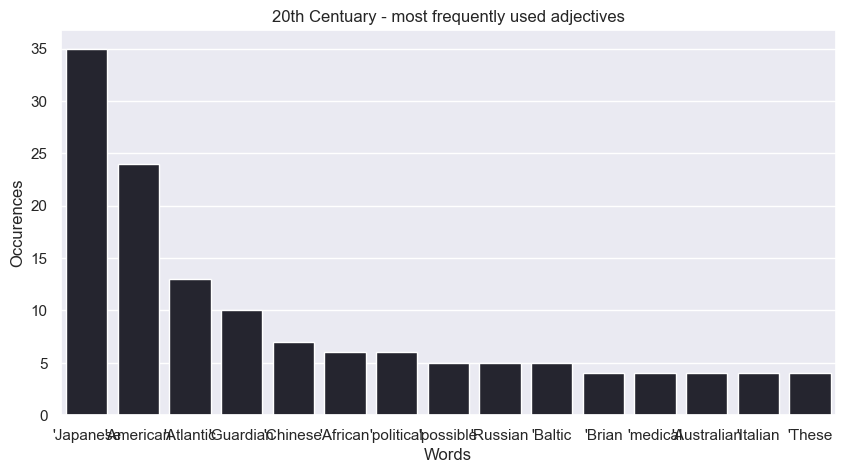

In [97]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Words", y="Occurences",
    saturation=0.9, data=top10).set_title("20th Centuary - most frequently used adjectives")

In [99]:
##**Distribution of POS Tags**:
## - **Nouns (NN, NNS, NNP)**: These are likely to be among the most frequent tags, indicating the presence of numerous concrete objects or concepts in the text.
##   - **Verbs (VB, VBD)**: Verbs showing actions or states are also prominent, reflecting the dynamic elements within the text.
##   - **Adjectives (JJ)**: Adjectives provide descriptive detail and often follow nouns, hence they appear frequently.

In [104]:
## Counting character occurences
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Historic Key Events th century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today Historic events th century edit world beginning century edit Main article Edwardian era new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting From First World War aftermath caused major changes power balance world destroying transforming powerful empires war end wars World War I edit Main article World War I Arrest suspect Sarajevo following Assassination Archduke Franz Ferdinand First World War simply WWI termed Great War contemporaries started ended war extension century whole ignited Assassination Sarajevo Austro Hungarian Empire heir throne Erzherzog Franz Ferdinand Gavrilo Princip organization Young Bosnia Bosnian Serbs

In [107]:
# Create a count for the main characters
all_counts = Counter(re.sub(r'\\W+', ' ', listToStr).split())

In [110]:
all_counts

Counter({'Retrieved': 205,
         'War': 124,
         'war': 86,
         'th': 81,
         'World': 74,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'History': 42,
         'www': 39,
         'ISBN': 39,
         'first': 38,
         'In': 37,
         'world': 36,
         'would': 35,
         'Japanese': 35,
         'century': 34,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'II': 31,
         'Union': 31,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 28,
         'also': 28,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'American': 24,
         'weapons': 24,
         'This': 23,
         'attack': 23,
         'new': 22,
         'history': 22,
         'Stalin': 21,
         'Holocaust': 21,
         'Africa': 21,
       

In [116]:
chars = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [119]:
chars.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [230]:
chars['countries'] = chars['country_name'].apply(lambda x: x.rsplit(' ',1)[-1])

In [232]:
chars

,country_name,country_name_20,countries
1,Afghanistan,,
2,Albania,,
3,Algeria,,
4,Andorra,,
5,Angola,,
...,...,...,...
205,Sahrawi Arab Democratic Republic,,
206,Somaliland,,
207,South Ossetia,,
208,Taiwan,,


In [236]:
char_list = chars['countries'].to_list()

In [238]:
dict_of_counts = {d : all_counts[d] for d in char_list}

In [240]:
dict_of_counts

{'': 0,
 'Azerbaijan': 0,
 'Burundi': 0,
 'Republic': 4,
 'Ethiopia': 0,
 'France': 16,
 'Guinea': 4,
 'Guyana': 0,
 'Hungary': 3,
 'Coast': 0,
 'Jordan': 0,
 'Kyrgyzstan': 0,
 'Luxembourg': 1,
 'Myanmar': 0,
 'Norway': 5,
 'Oman': 0,
 'Portugal': 0,
 'Qatar': 0,
 'Rwanda': 0,
 'Syria': 0,
 'Tuvalu': 0,
 'Uzbekistan': 0,
 'Vietnam': 13,
 'Yemen': 0,
 'Zimbabwe': 0,
 'Transnistria': 0}

In [242]:
# Search for the names from the list in the dictionary
dct = {v:[k] for v,k in dict_of_counts.items()}
df = pd.DataFrame(dct)

In [244]:
df

,,Azerbaijan,Burundi,Republic,Ethiopia,France,Guinea,Guyana,Hungary,Coast,...,Portugal,Qatar,Rwanda,Syria,Tuvalu,Uzbekistan,Vietnam,Yemen,Zimbabwe,Transnistria
0,0,0,0,4,0,16,4,0,3,0,...,0,0,0,0,0,0,13,0,0,0


In [246]:
df = df.transpose().reset_index()

In [248]:
df.dtypes

index    object
0         int64
dtype: object

In [250]:
df

,index,0
0,,0
1,Azerbaijan,0
2,Burundi,0
3,Republic,4
4,Ethiopia,0
5,France,16
6,Guinea,4
7,Guyana,0
8,Hungary,3
9,Coast,0


In [252]:
df.rename(columns = {"index":"country name", 0:"Times mentioned"}, inplace = True)

In [254]:
df

,country name,Times mentioned
0,,0
1,Azerbaijan,0
2,Burundi,0
3,Republic,4
4,Ethiopia,0
5,France,16
6,Guinea,4
7,Guyana,0
8,Hungary,3
9,Coast,0


In [256]:
df.shape

(26, 2)

C:\Users\Priya\AppData\Local\Temp\ipykernel_19364\3761879043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country name', y='Times mentioned', data = df, palette='viridis')


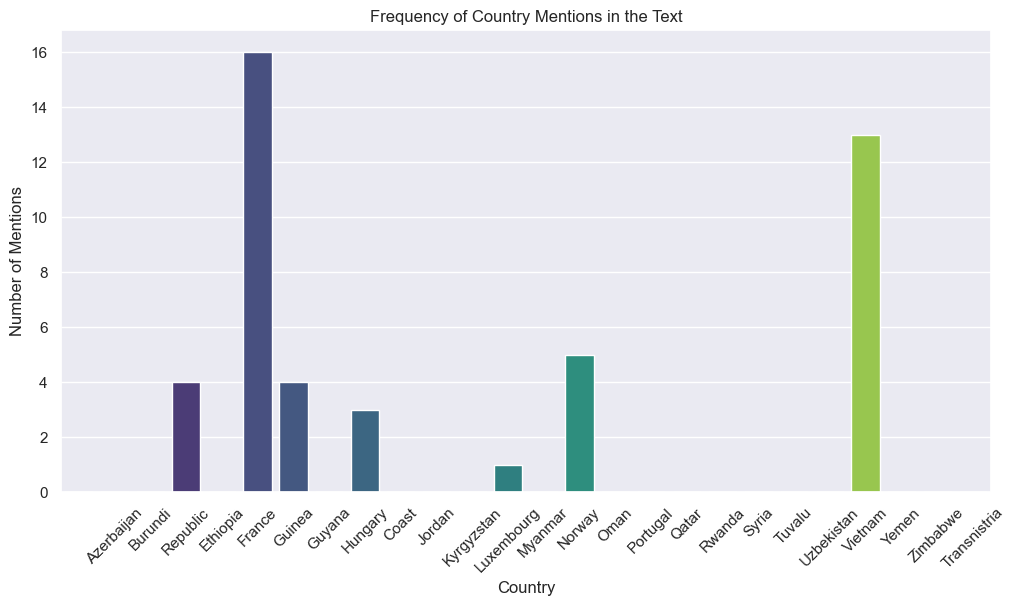

In [258]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country name', y='Times mentioned', data = df, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Mentions')
plt.title('Frequency of Country Mentions in the Text')
plt.xticks(rotation=45)
plt.show()

In [260]:
## Sentiment Analysis
text_sent = TextBlob(str(filtered))

In [262]:
print(text_sent.sentiment)

Sentiment(polarity=0.04904678869980587, subjectivity=0.3510861387176037)
